# Anticorruption and Just Energy Transition - UNDP

In [90]:
import pandas as pd
import numpy as np
import warnings
import random
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import xlsxwriter

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

from mpl_toolkits.axes_grid1 import make_axes_locatable

## Load files

In [91]:
GDP = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_GDP.csv", dtype={'column_name': str})
Momentum = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_Momentum.csv", dtype={'column_name': str})
Population = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_Population.csv", dtype={'column_name': str})
SDG7 = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/SDG Indicator 2023.xlsx", dtype={'column_name': str})
CPI = pd.read_excel("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/CPI 2022.xlsx", dtype={'column_name': str})
ETI = pd.read_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/01_Input/Output_ETI.csv", dtype={'column_name': str}, low_memory=False)

## Merging and cleaning up

In [39]:
common_columns = ['Country Code', 'Year', 'Country']

# List of dataframes to merge
dataframes_to_merge = [ETI, GDP, Population, SDG7, CPI]

# Merge dataframes one by one with unique suffixes
suffixes = ['_ETI', '_GDP', '_Population', '_SDG7', '_CPI']
merged_df = dataframes_to_merge[0]

for i, df in enumerate(dataframes_to_merge[1:]):
    merged_df = merged_df.merge(df, on=common_columns, how='outer', suffixes=('', suffixes[i]))

# Remove some unnecessary columns
dropped_columns = ['','Country_params_map&summary','_Country_Colors', '_Country_Params', 'Country (copy)', 'Country (group)']
merged_df = merged_df.drop(columns=dropped_columns, errors='ignore')

# Display and save
print(merged_df)
merged_df.to_csv("C:/Users/Ardhi/OneDrive - SIPA, Columbia University/MPA SIPA/Work/UNDP/Anticorruption and Just Energy/Energy-Corruption-main/02_Output/Merged_df.csv")


                        Country Country Code  Global rank ETI  Global rank SP  \
0                       Albania          ALB             21.0            11.0   
1                       Albania          ALB             21.0            11.0   
2                       Albania          ALB             21.0            11.0   
3                       Albania          ALB             21.0            11.0   
4                       Albania          ALB             21.0            11.0   
...                         ...          ...              ...             ...   
22048                  Slovakia          SVK              NaN             NaN   
22049                    Taiwan          TWN              NaN             NaN   
22050                     Yemen          YEM              NaN             NaN   
22051  United States of America          USA              NaN             NaN   
22052                     Syria          SYR              NaN             NaN   

       Global rank TR Inclu

## Energy Indicators

### Scatterplot Indicators 7.1.1

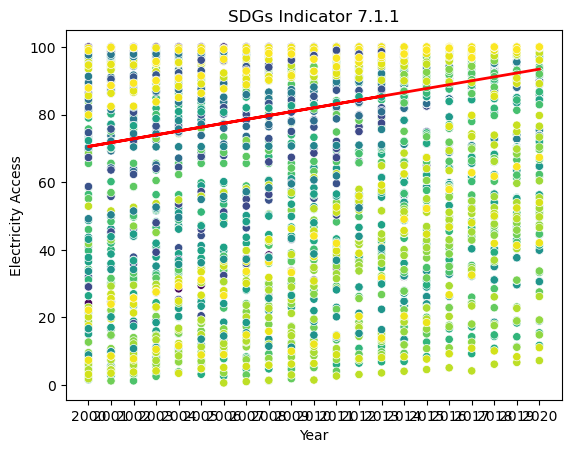

In [97]:
#Scatterplot Indicators 7.1.1
# Select relevant columns
scatter_data = merged_df[['Year', 'sdg7_elecac', 'Country']]

# Drop rows with missing values
scatter_data = scatter_data.dropna(subset=['Year', 'sdg7_elecac'])

# Convert 'Year' to numeric
scatter_data['Year'] = pd.to_numeric(scatter_data['Year']).round().astype(int)

# Create scatter plot
sns.scatterplot(x='Year', y='sdg7_elecac', data=scatter_data, hue='Country', palette='viridis', legend=False)

# Fit linear regression model
X = scatter_data[['Year']]
y = scatter_data['sdg7_elecac']

# Set x-axis ticks to be integers
plt.xticks(scatter_data['Year'].unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Show the plot
plt.title('SDGs Indicator 7.1.1')
plt.xlabel('Year')
plt.ylabel('Electricity Access')
plt.show()

### Scatterplot Indicators 7.1.2

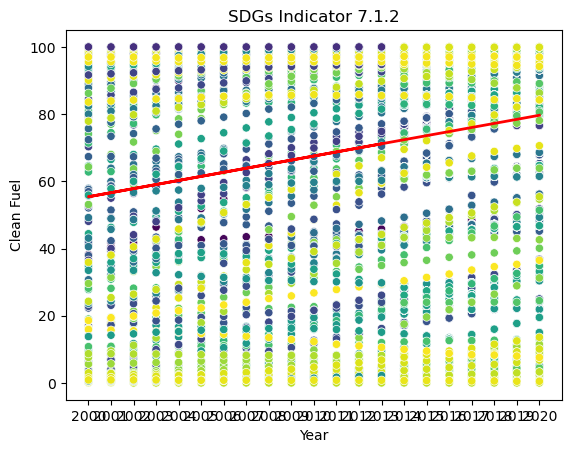

In [98]:
#Scatterplot Indicators 7.1.2
# Select relevant columns
scatter_data = merged_df[['Year', 'sdg7_cleanfuel', 'Country']]

# Drop rows with missing values
scatter_data = scatter_data.dropna(subset=['Year', 'sdg7_cleanfuel'])

# Convert 'Year' to numeric
scatter_data['Year'] = pd.to_numeric(scatter_data['Year']).round().astype(int)

# Create scatter plot
sns.scatterplot(x='Year', y='sdg7_cleanfuel', data=scatter_data, hue='Country', palette='viridis', legend=False)

# Fit linear regression model
X = scatter_data[['Year']]
y = scatter_data['sdg7_cleanfuel']

# Set x-axis ticks to be integers
plt.xticks(scatter_data['Year'].unique())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Show the plot
plt.title('SDGs Indicator 7.1.2')
plt.xlabel('Year')
plt.ylabel('Clean Fuel')
plt.show()

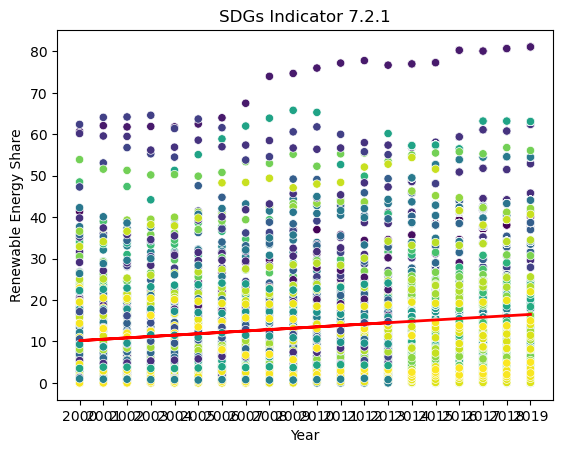

In [99]:
#Scatterplot Indicators 7.2.1
# Select relevant columns
scatter_data = merged_df[['Year', 'sdg7_renewcon', 'Country']]

# Drop rows with missing values
scatter_data = scatter_data.dropna(subset=['Year', 'sdg7_renewcon'])

# Convert 'Year' to numeric
scatter_data['Year'] = pd.to_numeric(scatter_data['Year']).round().astype(int)

# Create scatter plot
sns.scatterplot(x='Year', y='sdg7_renewcon', data=scatter_data, hue='Country', palette='viridis', legend=False)

# Fit linear regression model
X = scatter_data[['Year']]
y = scatter_data['sdg7_renewcon']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Set x-axis ticks to be integers
plt.xticks(scatter_data['Year'].unique())

# Plot the regression line
plt.plot(X, model.predict(X), color='red', linewidth=2)

# Show the plot
plt.title('SDGs Indicator 7.2.1')
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share')
plt.show()

## CPI vs ETI

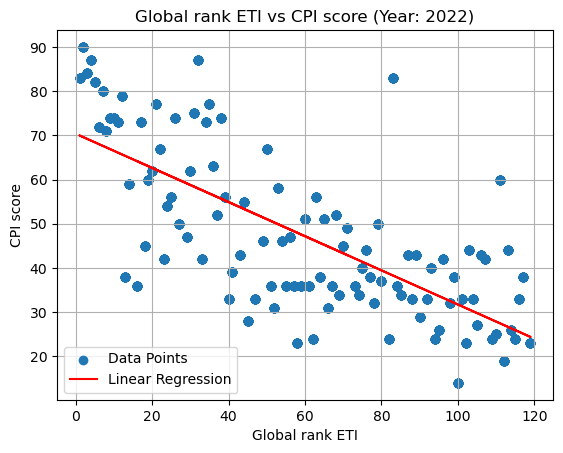

In [100]:
x_column = 'Global rank ETI'
y_column = 'CPI score'
year_filter = 2022

# Filter data for the year 2022 and remove rows with NaN values in relevant columns
filtered_df = merged_df.loc[(merged_df['Year'] == year_filter) & ~merged_df[[x_column, y_column]].isnull().any(axis=1)]

# Create scatter plot
plt.scatter(filtered_df[x_column], filtered_df[y_column], label='Data Points')
plt.title(f'{x_column} vs {y_column} (Year: {year_filter})')
plt.xlabel(x_column)
plt.ylabel(y_column)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(filtered_df[x_column], filtered_df[y_column])

# Plot linear regression line
plt.plot(filtered_df[x_column], slope * filtered_df[x_column] + intercept, color='red', label='Linear Regression')

plt.legend()
plt.grid(True)
plt.show()

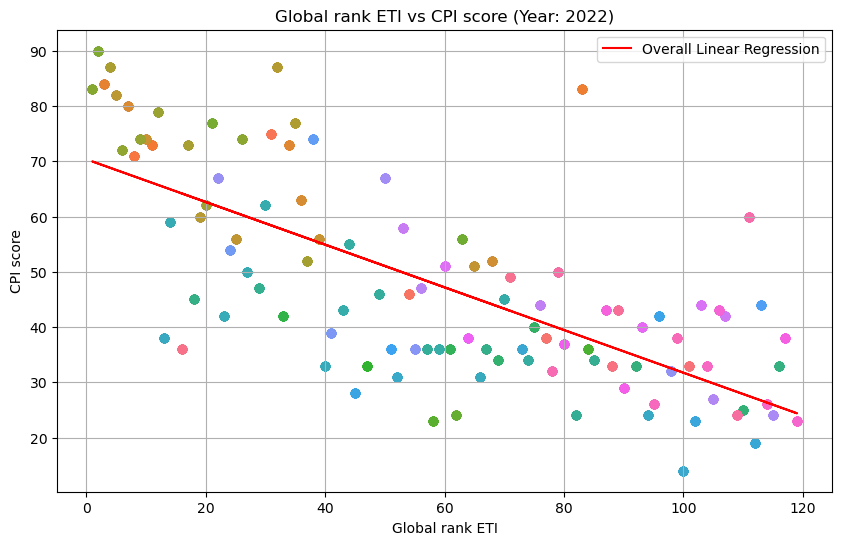

In [105]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns  # Import seaborn for a nice color palette

# Assuming 'Global rank ETI' and 'CPI score' are column names in your merged_df dataframe
x_column = 'Global rank ETI'
y_column = 'CPI score'
year_filter = 2022

# Filter data for the year 2022 and remove rows with NaN values in relevant columns
filtered_df = merged_df.loc[(merged_df['Year'] == year_filter) & ~merged_df[[x_column, y_column]].isnull().any(axis=1)]

# Get unique countries in the filtered dataset
unique_countries = filtered_df['Country'].unique()

# Set up a seaborn color palette with unique colors for each country
colors = sns.color_palette('husl', n_colors=len(unique_countries))

# Create scatter plot with different colors for each country
plt.figure(figsize=(10, 6))

for i, country in enumerate(unique_countries):
    country_data = filtered_df[filtered_df['Country'] == country]
    plt.scatter(country_data[x_column], country_data[y_column], color=colors[i]) #, label=country

# Perform linear regression on the entire dataset
slope, intercept, _, _, _ = linregress(filtered_df[x_column], filtered_df[y_column])

# Plot overall linear regression line
plt.plot(filtered_df[x_column], slope * filtered_df[x_column] + intercept, color='red', label='Overall Linear Regression')

plt.title(f'{x_column} vs {y_column} (Year: {year_filter})')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()
plt.grid(True)
plt.show()


>energy indicators 7.1.1, 7.1.2, 7.2.1 

>correlation analysis - corruption perception index & ETI

>correlation analysis - proxy indicators on governance/quality of institutions (business integrity, trust, social contract) & ETI 

>find data on corruption, bribery, public procurement in the broader energy sector and within the energy transition and its sub-sections, control of corruption indicator, corruption barometer, V- Dem Index